In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Data Sets/train_data.csv'  # Update the path accordingly

# Read the CSV file
data = pd.read_csv(file_path)

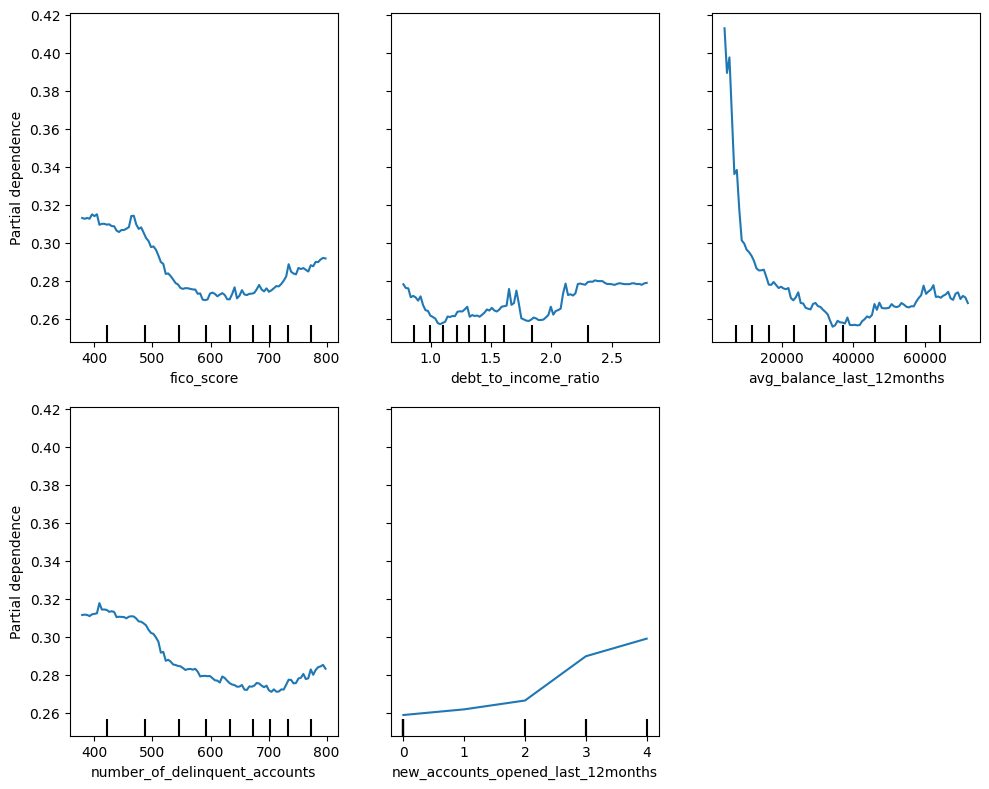

In [ ]:
# Define the target variable and features
X = data.drop(['charge_off_status'], axis=1)  # Replace 'charge_off_status' with your target variable
y = data['charge_off_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Select features for partial dependence plots
features_to_plot = [
    'fico_score',
    'debt_to_income_ratio',
    'avg_balance_last_12months',
    'number_of_delinquent_accounts',
    'new_accounts_opened_last_12months'
]

# Generate and display partial dependence plots
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(model, X_train, features_to_plot, ax=ax)

plt.tight_layout()
plt.show()


In [ ]:
combined_data = pd.concat([X_train, y_train], axis=1)

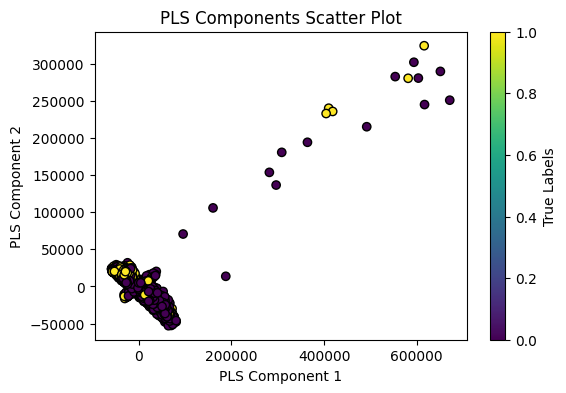

In [ ]:
# Apply PLS
pls = PLSRegression(n_components=2, scale=False)  # Choose the number of components as needed
pls.fit(X_train, y_train)

# To visualize relationships, plot the first two components
X_scores = pls.x_scores_

y_train_values = y_train.values

plt.figure(figsize=(6, 4))
plt.scatter(X_scores[:, 0], X_scores[:, 1], c=y_train_values, cmap='viridis', edgecolor='k')
plt.colorbar(label='True Labels')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS Components Scatter Plot')
plt.show()


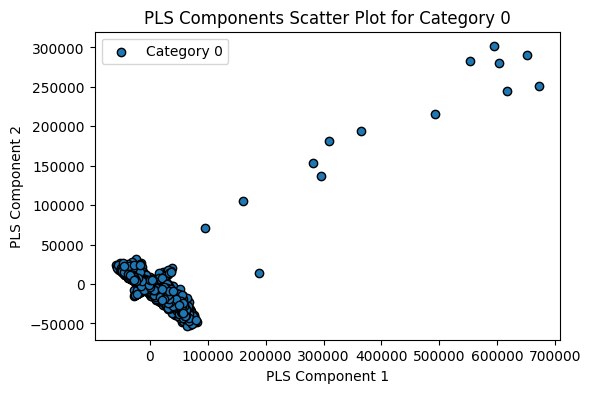

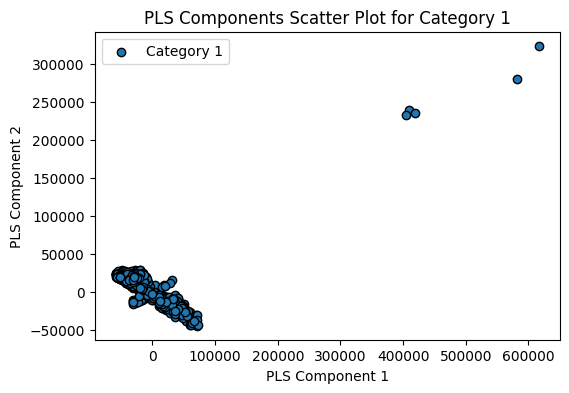

In [ ]:
# Get unique response categories
unique_categories = y_train.unique()

# Plot for each category
for category in unique_categories:
    # Filter data for the current category
    category_indices = y_train == category
    X_scores_category = X_scores[category_indices]

    plt.figure(figsize=(6, 4))
    plt.scatter(X_scores_category[:, 0], X_scores_category[:, 1],
                label=f'Category {category}', edgecolor='k')
    plt.xlabel('PLS Component 1')
    plt.ylabel('PLS Component 2')
    plt.title(f'PLS Components Scatter Plot for Category {category}')
    plt.legend()
    plt.show()

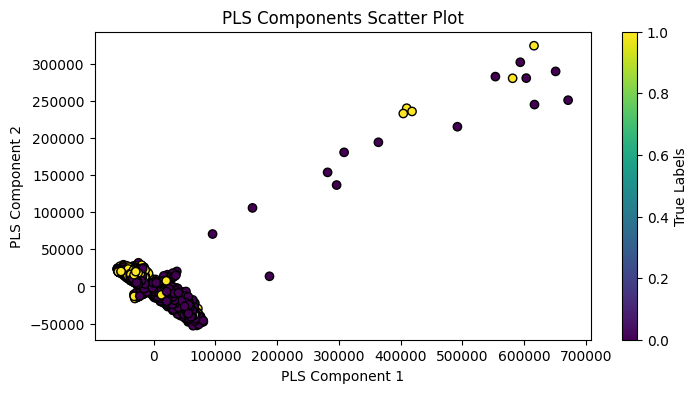

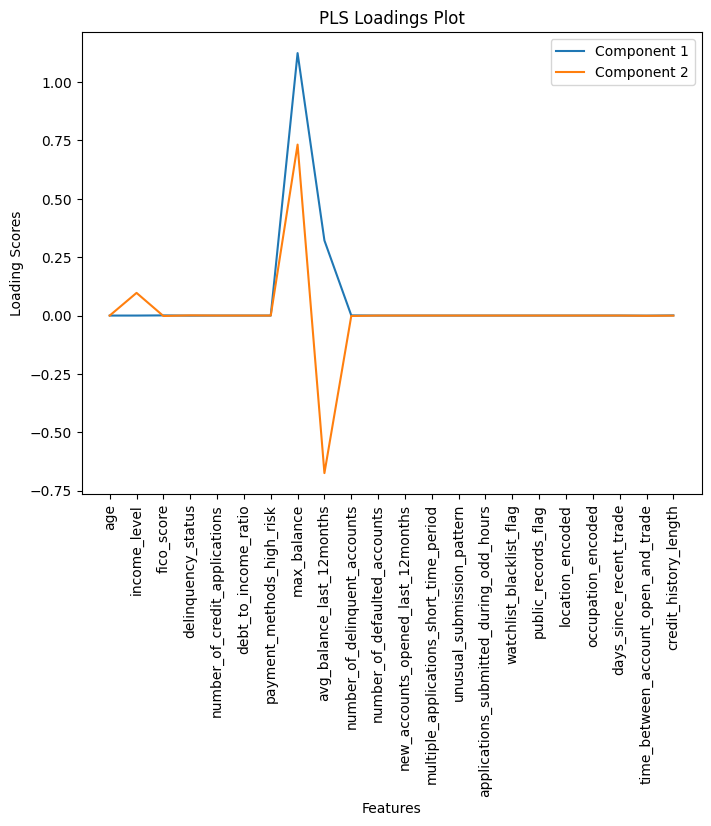

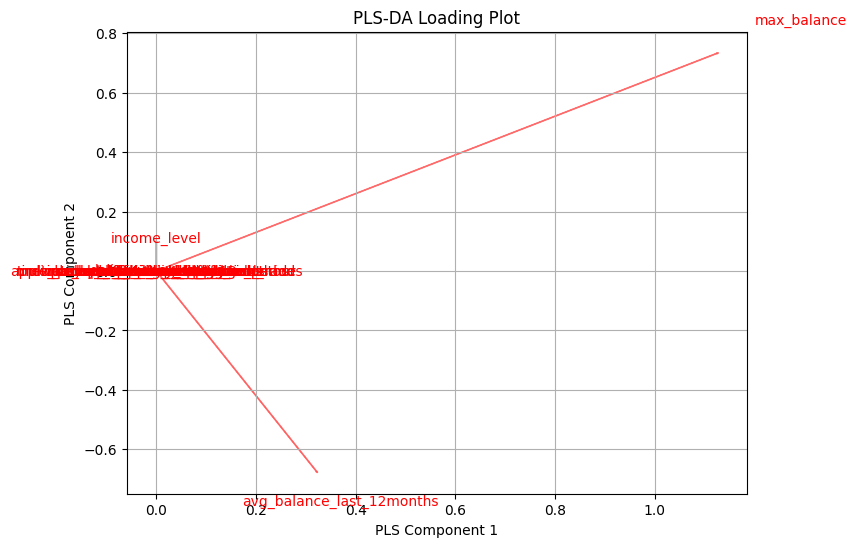

In [ ]:
# To visualize relationships, plot the first two components
X_scores = pls.x_scores_
loading_scores = pls.x_loadings_
feature_names = X.columns

# Plot PLS components scatter plot
plt.figure(figsize=(8, 4))
scatter = plt.scatter(X_scores[:, 0], X_scores[:, 1], c=y_train_values, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='True Labels')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS Components Scatter Plot')
plt.show()

# Plot the loading scores to see which features are important
plt.figure(figsize=(8, 6))
for i in range(loading_scores.shape[1]):
    plt.plot(loading_scores[:, i], label=f'Component {i+1}')
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Loading Scores')
plt.title('PLS Loadings Plot')
plt.legend()
plt.show()

# Combined plot of scores and loadings
plt.figure(figsize=(8, 6))

# Scores plot
# plt.scatter(X_scores[:, 0], X_scores[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.5)
# for i, category in enumerate(label_encoder.classes_):
#     plt.text(X_scores[y_train == i, 0].mean(), X_scores[y_train == i, 1].mean(), category, fontsize=12, weight='bold')

# Loadings plot
for i in range(len(feature_names)):
    plt.arrow(0, 0, loading_scores[i, 0], loading_scores[i, 1], color='r', alpha=0.5)
    plt.text(loading_scores[i, 0]*1.15, loading_scores[i, 1]*1.15, feature_names[i], color='r', ha='center', va='center')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Loading Plot')
plt.grid()
plt.show()